In [147]:
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [148]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the data from the h5py file and understand the train/test splits:**

In [149]:
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5','r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [150]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [151]:
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

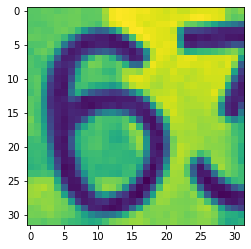

In [152]:
plt.imshow(X_train[1])

In [153]:
  print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


**Reshape and normalize the train and test features:**

In [154]:
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

**One hot encode the labels for train and test data:**

In [155]:
train_y= tf.keras.utils.to_categorical(y_train,num_classes=10)
test_y = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [156]:
train_y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax:**

In [157]:
model.add(Sequential([Flatten(), Dense(200, activation='relu')]))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

**Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation:**

In [158]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Fit and evaluate the model. Print the loss and accuracy for the test data:**

In [159]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
sequential_1 (Sequential)    (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 211,106
Trainable params: 209,058
Non-trainable params: 2,048
_________________________________________________________________


In [160]:
history = model.fit(X_train,train_y, validation_data=(X_test,test_y),epochs=20,batch_size=32)

Epoch 1/20
1313/1313 [==============================] - 8s 5ms/step - loss: 1.7378 - accuracy: 0.4502 - val_loss: 0.9282 - val_accuracy: 0.7173
Epoch 2/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.9552 - accuracy: 0.7034 - val_loss: 0.7632 - val_accuracy: 0.7777
Epoch 3/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.8161 - accuracy: 0.7513 - val_loss: 0.7662 - val_accuracy: 0.7766
Epoch 4/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.7469 - accuracy: 0.7755 - val_loss: 0.7591 - val_accuracy: 0.7892
Epoch 5/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.6937 - accuracy: 0.7886 - val_loss: 0.6702 - val_accuracy: 0.8136
Epoch 6/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.6614 - accuracy: 0.7977 - val_loss: 0.6089 - val_accuracy: 0.8335
Epoch 7/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.6373 - accuracy: 0.8098 - val_loss: 0.6452 - val_accuracy:

In [161]:
model.evaluate(X_test,test_y)

563/563 [==============================] - 1s 2ms/step - loss: 0.5709 - accuracy: 0.8526


[0.570894181728363, 0.8526111245155334]

In [162]:
y_pred = np.argmax(model.predict(X_test),axis=1)

In [163]:
len(y_pred)

18000

In [164]:
confusion_matrix(y_test, y_pred)

array([[1657,   34,   15,   10,   18,    5,   16,   12,   14,   33],
       [  38, 1574,   39,   22,   48,    4,   18,   50,   18,   17],
       [  25,   24, 1568,   16,   28,   13,    9,   50,   28,   42],
       [  16,   45,   53, 1315,   20,  108,   38,   27,   56,   41],
       [  23,   45,   34,   13, 1604,    6,   17,    9,   22,   39],
       [  19,   21,   16,   60,    9, 1493,   79,   12,   23,   36],
       [  57,   18,   16,   10,   45,   66, 1533,   11,   59,   17],
       [  23,   75,   48,   10,   14,   10,    5, 1586,   15,   22],
       [  39,   38,   23,   37,   21,   23,   82,    9, 1476,   64],
       [  64,   35,   37,   13,   17,   38,   11,   16,   32, 1541]])

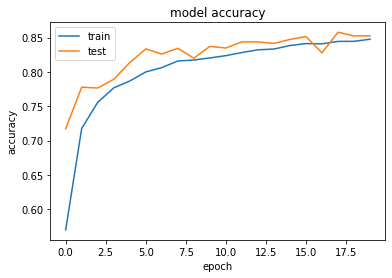

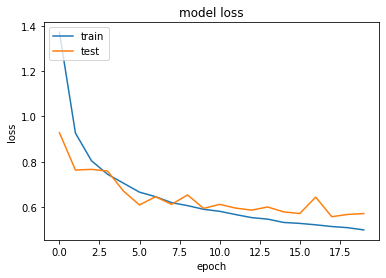

In [165]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

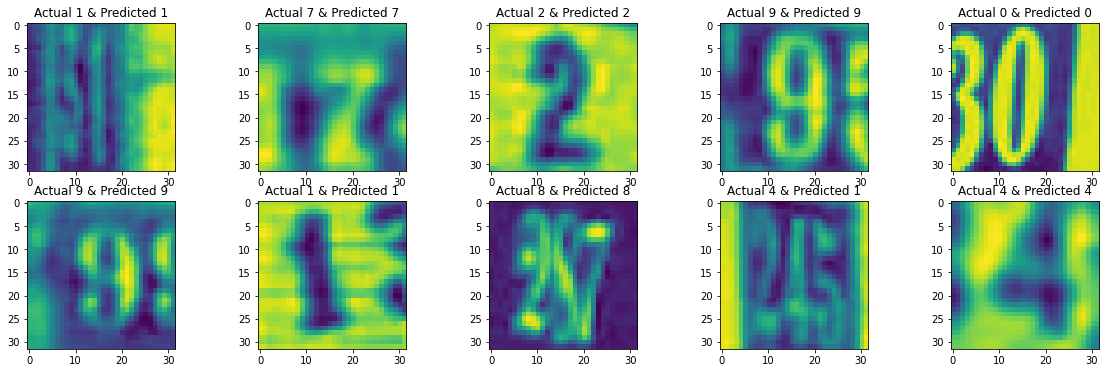

In [166]:
fig = plt.figure(figsize=(20,6))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y_test[0],y_pred[0])) 
axes[0,0].imshow(X_test[0])

axes[0,1].set_title('Actual {} & Predicted {}'.format(y_test[1],y_pred[1]))
axes[0,1].imshow(X_test[1])

axes[0,2].set_title('Actual {} & Predicted {}'.format(y_test[2],y_pred[2]))
axes[0,2].imshow(X_test[2])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y_test[3],y_pred[3]))
axes[0,3].imshow(X_test[3])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y_test[4],y_pred[4]))
axes[0,4].imshow(X_test[4])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y_test[5],y_pred[5]))
axes[1,0].imshow(X_test[5])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y_test[6],y_pred[6]))
axes[1,1].imshow(X_test[6])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y_test[7],y_pred[7]))
axes[1,2].imshow(X_test[7])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y_test[8],y_pred[8]))
axes[1,3].imshow(X_test[8])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y_test[9],y_pred[9]))
axes[1,4].imshow(X_test[9])
plt.show()
